In [59]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import KernelPCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
%matplotlib inline 

In [48]:
dfTrain = pd.read_csv('../data/TRAIN_TEST_corrected2/train_corrected2.csv')\
            .drop(['id', 'year_created', 'month_created', 'day_created'], axis=1)

target = dfTrain.price_usd
dfTrain = dfTrain.drop(['price_usd'], axis=1)

In [49]:
dfTrain.head()

,distance_to_obelisco_mtrs,lat,lon,surface_total_in_m2,rooms,PH,apartment,house,store
0,16861.066565,-34.600116,-58.565334,62.0,3.0,0.0,1.0,0.0,0.0
1,5360.128545,-34.597274,-58.439479,44.0,2.0,0.0,1.0,0.0,0.0
2,52335.901227,-34.602089,-58.952129,150.0,2.0,0.0,0.0,1.0,0.0
3,6330.619537,-34.567401,-58.434775,250.0,4.0,0.0,1.0,0.0,0.0
4,7561.524039,-34.626409,-58.459324,40.0,1.0,0.0,1.0,0.0,0.0


In [55]:
svd = TruncatedSVD(n_components=3, algorithm='randomized')

In [56]:
reduction = svd.fit_transform(dfTrain)

In [57]:
reduction = pd.DataFrame(reduction, columns=['dim_1', 'dim_2', 'dim_3'])

In [58]:
reduction.head()

,dim_1,dim_2,dim_3
0,16861.070022,65.129637,-64.200309
1,5360.131148,47.710467,-65.179894
2,52335.908881,151.271089,-59.094490
3,6330.632057,253.300764,-52.948586
4,7561.526446,43.610413,-65.406529


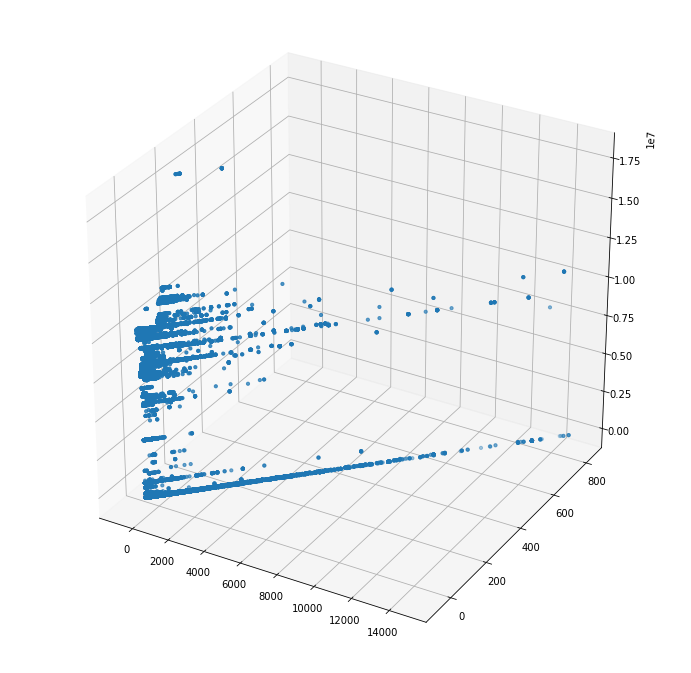

In [63]:
#reduction.plot(kind='scatter', x='dim_1', y='dim_2', figsize=(12,12));

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(reduction.dim_2, reduction.dim_3, zs=reduction.dim_1, s=10)


In [64]:
pca = KernelPCA(n_components=3, kernel='rbf', n_jobs=-1)

In [65]:
reduction_pca = pca.fit_transform(dfTrain.sample(frac=0.01))

In [66]:
reduction_pca = pd.DataFrame(reduction_pca, columns=['dim_1', 'dim_2', 'dim_3'])

In [67]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(reduction_pca.dim_2, reduction_pca.dim_3, zs=reduction.dim_1, s=10)

,dim_1,dim_2,dim_3
0,0.001465,-0.001240,-0.001019
1,0.001338,-0.001125,-0.000906
2,0.001600,-0.001362,-0.001143
3,0.001338,-0.001125,-0.000906
4,0.001338,-0.001125,-0.000906
